### Creating An ANN using Pytorch

In [51]:
import pandas as pd

data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
import seaborn as sns
import numpy as np

In [5]:
data['Outcome'] = np.where(data['Outcome']==1,'diabetic','non_diabetic')

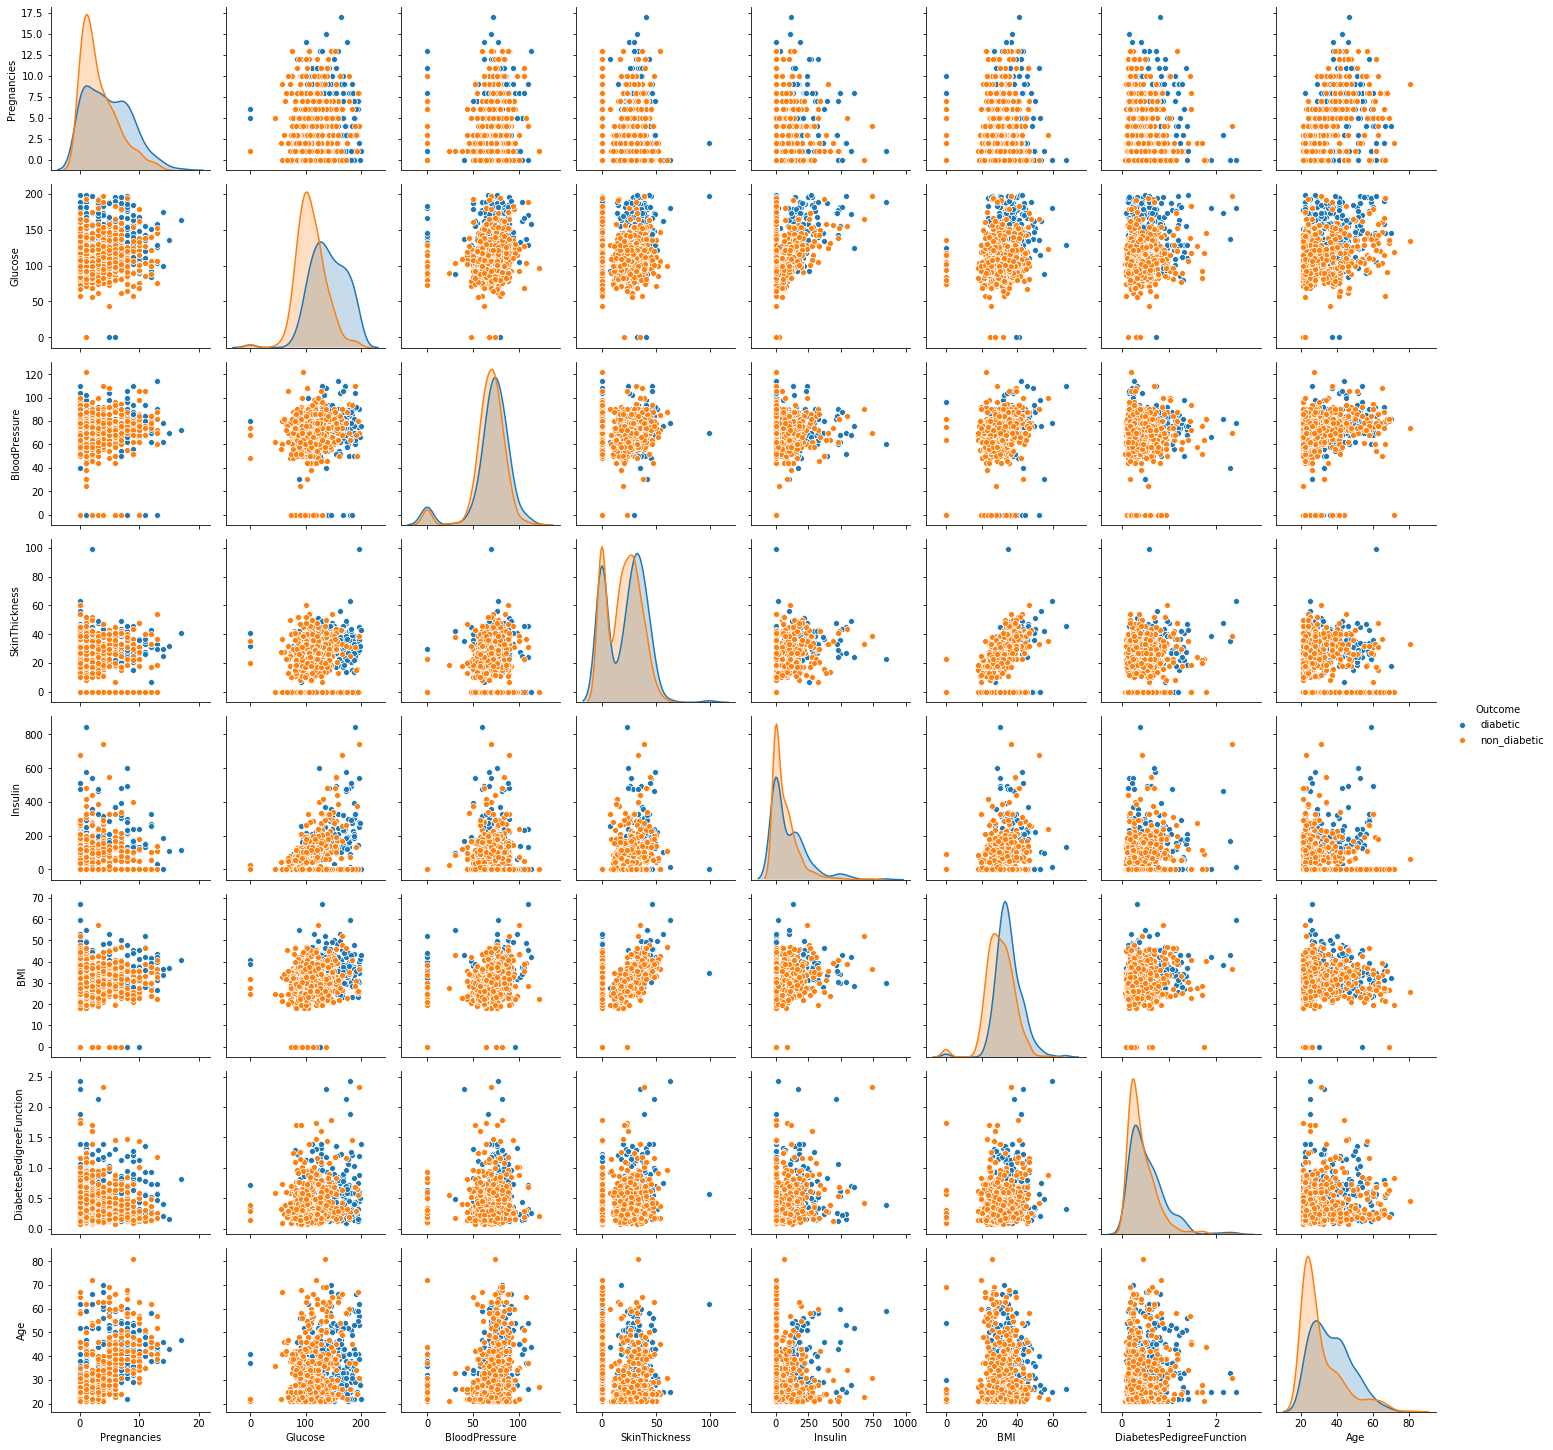

In [6]:
sns.pairplot(data,hue="Outcome")
# sns pairplot take hue as categorical

In [7]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
X = data.drop('Outcome',axis=1).values
y = data['Outcome'].values

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=0)

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [12]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
#independent feature must be converted to the FloatTensor

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [13]:
data.shape

(768, 9)

In [18]:
## Creating model

class ANN(nn.Module):
    def __init__(self,input_feature=8,hidden_feature = 20,output_feature=2):
        super().__init__()
        self.input_feature= input_feature
        self.hidden_feature = hidden_feature
        self.output_feature=output_feature
        
        self.dense_1 = nn.Linear(input_feature,hidden_feature)
        self.dense_2 = nn.Linear(hidden_feature,hidden_feature)
        self.out = nn.Linear(hidden_feature,output_feature)
        
        self.dropout = nn.Dropout(p=0.2)
    def forward(self,x):
        x = F.relu(self.dense_1(x))
        x = self.dropout(x)
        x = F.relu(self.dense_2(x))
        x = self.out(x)
        return x

In [19]:
torch.manual_seed(42)
model =ANN()

In [20]:
model.parameters

<bound method Module.parameters of ANN(
  (dense_1): Linear(in_features=8, out_features=20, bias=True)
  (dense_2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)>

In [23]:
### Backward propagation
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr =0.01)

In [27]:
epochs = 500
final_loss =[]

for i in range(epochs):
    i=i+1
    
    y_pred = model.forward(X_train)
    
    loss = loss_function(y_pred,y_train)
    
    final_loss.append(loss)
    
    if i%10 ==1:
        print("Loss after epoch {} is {}".format(i,loss.item()))
        
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
        
    

Loss after epoch 1 is 2.062325954437256
Loss after epoch 11 is 0.6847475171089172
Loss after epoch 21 is 0.6472870707511902
Loss after epoch 31 is 0.6498265862464905
Loss after epoch 41 is 0.6294826865196228
Loss after epoch 51 is 0.6216289401054382
Loss after epoch 61 is 0.6165962815284729
Loss after epoch 71 is 0.6034599542617798
Loss after epoch 81 is 0.5878838896751404
Loss after epoch 91 is 0.5845724940299988
Loss after epoch 101 is 0.564105749130249
Loss after epoch 111 is 0.5575166940689087
Loss after epoch 121 is 0.5642536282539368
Loss after epoch 131 is 0.5465275049209595
Loss after epoch 141 is 0.5452823042869568
Loss after epoch 151 is 0.5471367239952087
Loss after epoch 161 is 0.545039176940918
Loss after epoch 171 is 0.5581366419792175
Loss after epoch 181 is 0.5403831601142883
Loss after epoch 191 is 0.5393412113189697
Loss after epoch 201 is 0.5152550339698792
Loss after epoch 211 is 0.525290846824646
Loss after epoch 221 is 0.504456102848053
Loss after epoch 231 is 0.5

In [28]:
import matplotlib.pyplot as plt

%matplotlib inline

Text(0.5, 0, 'Epochs')

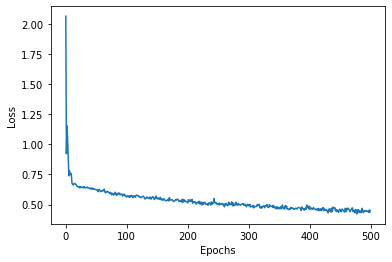

In [29]:
plt.plot(range(500),final_loss)
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [32]:
## prediction
predictions = []
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred =model(data) 
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
1
1
0
1
0
0
0
0
1
0
0
0
1
1
1
0
0
1
0
1
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
0
0
0
1
0
0
1
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0


In [34]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test,predictions)
cf

array([[95, 12],
       [21, 26]])

Text(69.0, 0.5, 'Predicted_value')

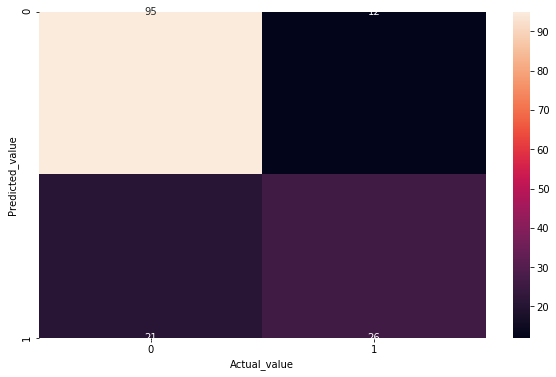

In [36]:
plt.figure(figsize=(10,6))

sns.heatmap(cf,annot=True)

plt.xlabel("Actual_value")
plt.ylabel("Predicted_value")

In [37]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test,predictions)
print(acc)

0.7857142857142857


In [38]:
## saving the model

torch.save(model,'diabetes.pt')

/home/sid/.local/lib/python3.6/site-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type ANN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [39]:
#load model
model1 = torch.load('diabetes.pt')

In [54]:
model1.load_state_dict(torch.load('diabetes.pt'))

AttributeError: 'ANN' object has no attribute 'copy'

In [40]:
model1.eval()

ANN(
  (dense_1): Linear(in_features=8, out_features=20, bias=True)
  (dense_2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [43]:
list1 =[6.0,130.0,72.0,40.0,0.0,25.0,0.627,45.0]
new_data = torch.Tensor(list1)

In [45]:
#predicting new data
with torch.no_grad():
    y_pred =model(new_data) 
    print(y_pred)
    print(y_pred.argmax().item())

tensor([-1.3788, -2.1710])
0


In [53]:
import torch.onnx

In [ ]:
device = "cuda"